## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import codecs
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
tweet_df = pd.read_csv('/content/ua8_10005.csv')
tweet_df.head()

,Label,Tweet
0,Non_HS,detikcom: Terpopuler Siapa bilang lulusan SMK ...
1,HS,detikcom: Anggota DPR RI Fadli Zon menyentil...
2,Non_HS,detikcom: Ayam gulai McDonalds sedang viral ak...
3,Non_HS,detikcom: Beragam pertanyaan kontroversial did...
4,Non_HS,detikcom: Bobby geram karena melihat ada tulis...


Terdapat 2 kolom. Label dan Tweet. Kolom Label berisi kelas dari tweet. Kelas Non_HS menandakan bahwa tweet tersebut bukan termasuk kategori hate speech. Kelas HS menandakan bahwa tweet tersebut termasuk kategori hate speech.

In [ ]:
# contoh tweet Non_HS
tweet_df[tweet_df['Label']=='Non_HS'].head()

,Label,Tweet
0,Non_HS,detikcom: Terpopuler Siapa bilang lulusan SMK ...
2,Non_HS,detikcom: Ayam gulai McDonalds sedang viral ak...
3,Non_HS,detikcom: Beragam pertanyaan kontroversial did...
4,Non_HS,detikcom: Bobby geram karena melihat ada tulis...
5,Non_HS,detikcom: Dalam menyambut Idul Fitri 2021 desa...


In [ ]:
tweet_df['Tweet'][0]

'detikcom: Terpopuler Siapa bilang lulusan SMK tak mampu membuat startup? Pria bernama Sopian Gunawan ini berhasil membuktikannya    Bex80\\ '

In [ ]:
# contoh tweet HS
tweet_df[tweet_df['Label']=='HS'].head()

,Label,Tweet
1,HS,detikcom: Anggota DPR RI Fadli Zon menyentil...
62,HS,qopplaq: @integreet @Vivisd7 @detikcom mungkin...
64,HS,Ziarah kubur berpotensi jadi klaster baru? Kl ...
65,HS,Zionis Yahudi biadab zionis yahudi teroris #zi...
69,HS,_banyulaut @beautyisgina_ @detikcom Pssss m...


In [ ]:
tweet_df['Tweet'][453]

'AFauzi51174584 @detikcom Harusnya kasir indomaret nanya dulu ye ke anak2 yg belanja ke situ          Lu anak siapa tong      x80\\ https://t   co/YSQvY3OSZ5'

In [ ]:
# contoh tweet Abusive
tweet_df[tweet_df['Label']=='Abusive'].head()

,Label,Tweet
61,Abusive,prasetyaa8: @detikcom besok anaknya top up sej...
66,Abusive,masbul @detikcom ga segampang itu memasuki dae...
67,Abusive,_andhiy_ @detikcom Kalo kuning di kira tai
70,Abusive,_banyulaut @detikcom Akun bokep gausah sok keras
78,Abusive,_banyulaut @detikcom Maksud kAUUUU


In [ ]:
# check missing values
tweet_df.isnull().sum().sort_values(ascending=False)

Tweet    0
Label    0
dtype: int64

Tidak ada missing values

## Class Distribution

Non_HS     594
Abusive    465
HS         417
Name: Label, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


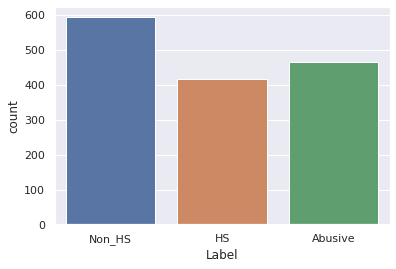

In [ ]:
print(tweet_df['Label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['Label']))

Jumlah kelas Non_HS lebih banyak dari jumlah kelas HS

In [ ]:
jum_Non_HS = tweet_df[tweet_df['Label']=='Non_HS']['Label'].count()
jum_HS = tweet_df[tweet_df['Label']=='HS']['Label'].count()
jum_Abusive = tweet_df[tweet_df['Label']=='Abusive']['Label'].count()
percent_Non_HS = (jum_Non_HS/(jum_Abusive+jum_Non_HS+jum_HS)*100)
percent_HS= (jum_HS/(jum_Abusive+jum_HS+jum_Non_HS))*100
percent_Abusive= (jum_Abusive/(jum_Abusive+jum_HS+jum_Non_HS))*100
print(percent_Non_HS)
print(percent_HS)
print(percent_Abusive)

40.243902439024396
28.252032520325205
31.50406504065041


In [ ]:
# info dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1476 non-null   object
 1   Tweet   1476 non-null   object
dtypes: object(2)
memory usage: 23.2+ KB


In [ ]:
# describe dataset
tweet_df.describe()

,Label,Tweet
count,1476,1476
unique,3,1471
top,Non_HS,Mudah2an gw ketemu sama SI BABI IWAN BOPENG DI...
freq,594,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b2fa4c2d0>,
      dtype=object)

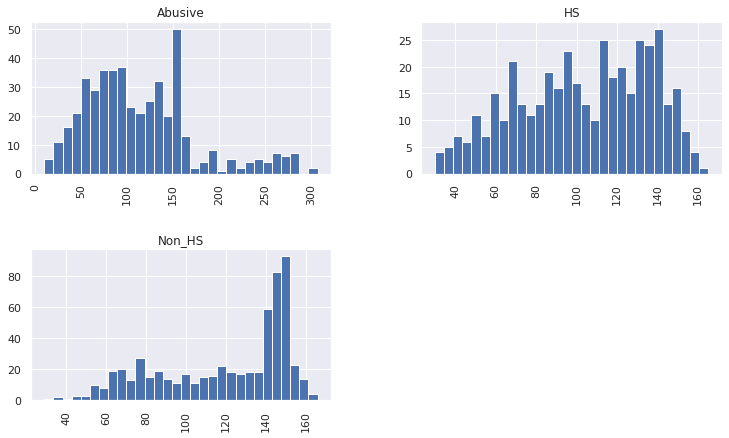

In [ ]:
tweet_df['length'] = tweet_df['Tweet'].apply(len)
tweet_df.hist(column='length', by='Label', bins=30, figsize=(12,7))

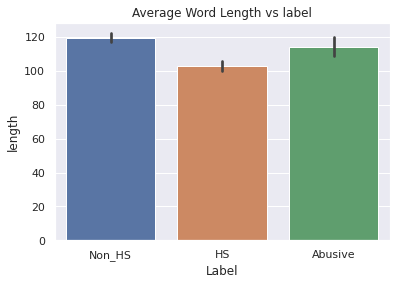

In [ ]:
fig1 = sns.barplot(x='Label',y='length',data = tweet_df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

## Preprocessing

In [ ]:
df =tweet_df.copy()

### Case Folding

In [ ]:
import re

In [ ]:
def case_folding(data):
  temp_tweet = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(#?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    #tw = re.sub(r"http\S+", "", tw)
    tw = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)
    tw = re.sub('  +', ' ', tw)  
    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^'#@]", " ", tw)
    tw = re.sub(" {2,}", " ", tw)
    tw = re.sub('\[', ' [', tw)
    tw = re.sub('\]', '] ', tw)
    tw = re.sub('\[quote[^ ]*\].*?\[\/quote\]#', ' ', tw)
    tw = re.sub('\[[^ ]*\]', ' ', tw)
    tw = re.sub('&quot;', ' ', tw)
    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)
 #remove_newline
    tw = re.sub('\n', ' ',tw)
    # convert text to Lowercase
    tw = tw.lower();
    temp_tweet.append(tw)
  return temp_tweet

In [ ]:
df['Case_folded']=case_folding(df['Tweet'])
df.head()

,Label,Tweet,length,Case_folded
0,Non_HS,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...
1,HS,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...
2,Non_HS,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...
3,Non_HS,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...
4,Non_HS,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...


### Tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [ ]:
df['Tokenized']=tokenized(df['Case_folded'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized
0,Non_HS,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,..."
1,HS,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye..."
2,Non_HS,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir..."
3,Non_HS,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,..."
4,Non_HS,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,..."


### Stemming

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 3.9MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [ ]:
df['Stemmed'] = df['Tokenized'].apply(stemming)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed
0,Non_HS,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,...","[detikcom, populer, siapa, bilang, lulus, smk,..."
1,HS,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye...","[detikcom, anggota, dpr, ri, fadli, zon, senti..."
2,Non_HS,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir..."
3,Non_HS,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,...","[detikcom, agam, tanya, kontroversial, duga, a..."
4,Non_HS,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,...","[detikcom, bobby, geram, karena, lihat, ada, t..."


### Slang Words Removal

In [ ]:
import requests

In [ ]:
slang_word = requests.get('https://raw.githubusercontent.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/master/cleaning_source/update_combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [ ]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [ ]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [ ]:
# remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [ ]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [ ]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [ ]:
df['Slang'] = df['Stemmed'].apply(removeSlang)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction,Slang
0,0,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, bilang, lulus, smk, startu...",detikcom populer bilang lulus smk startup pria...,Non_HS,"[detikcom, populer, siapa, bilang, lulus, smk,..."
1,1,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...",detikcom anggota dpr ri fadli zon sentil bijak...,HS,"[detikcom, anggota, dpr, ri, fadli, zon, senti..."
2,0,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, viral, yout...",detikcom ayam gulai mcdonalds viral youtuber j...,Non_HS,"[detikcom, ayam, gulai, mcdonalds, sedang, vir..."
3,0,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, kontroversial, duga, tes, mas...",detikcom agam kontroversial duga tes masuk thr...,Non_HS,"[detikcom, agam, tanya, kontroversial, duga, a..."
4,0,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, lihat, tulis, tutup, ...",detikcom bobby geram lihat tulis tutup meja la...,Non_HS,"[detikcom, bobby, geram, karena, lihat, ada, t..."


### Stop Words Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df['No_Stop']=removeStopWords(df['No_Slang'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,Non_HS,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, bilang, lulus, smk, startu..."
1,HS,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti..."
2,Non_HS,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, viral, yout..."
3,Non_HS,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, kontroversial, duga, tes, mas..."
4,Non_HS,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, lihat, tulis, tutup, ..."


## Encoding Target Value

In [ ]:
#df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df['Label']=df['Label'].apply(lambda x: 1 if x == 'HS'  else 2 if x == 'Abusive' else 0)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,0,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, bilang, lulus, smk, startu..."
1,1,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti..."
2,0,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, viral, yout..."
3,0,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, kontroversial, duga, tes, mas..."
4,0,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, lihat, tulis, tutup, ..."


In [ ]:
# combine cleaned text after removing stop words into one string
df['Ready'] = df['No_Stop'].apply(lambda x: ' '.join(x))
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,0,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, bilang, lulus, smk, startu...",detikcom populer bilang lulus smk startup pria...
1,1,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...",detikcom anggota dpr ri fadli zon sentil bijak...
2,0,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, viral, yout...",detikcom ayam gulai mcdonalds viral youtuber j...
3,0,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, kontroversial, duga, tes, mas...",detikcom agam kontroversial duga tes masuk thr...
4,0,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, lihat, tulis, tutup, ...",detikcom bobby geram lihat tulis tutup meja la...


## Combine Cleaned Tweet and Label

In [ ]:
data1 = df[['Ready']]
data2 = df[['Label']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,Label
0,detikcom populer bilang lulus smk startup pria...,0
1,detikcom anggota dpr ri fadli zon sentil bijak...,1
2,detikcom ayam gulai mcdonalds viral youtuber j...,0
3,detikcom agam kontroversial duga tes masuk thr...,0
4,detikcom bobby geram lihat tulis tutup meja la...,0


## Text Vectorization (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = dataset['Ready']
label = dataset['Label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(1476, 5450)

## Dealing With Imbalance Class

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(1782, 5450)
(1782,)


## Split Data (Training and Testing Data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1425, 5450)
(357, 5450)
(1425,)
(357,)


## Most Common Words VS Importants Words

In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [ ]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 orangx      0.0
ps          0.0
specific    0.0
fakultas    0.0
sox         0.0
maksa       0.0
faksi       0.0
malaikat    0.0
sorot       0.0
pssss       0.0
dtype: float64


Most important words:
 bajing         1.000000
kesel          0.935331
bau            0.877704
laki           0.872019
infobdg        0.855400
adipurajaka    0.854347
tipu           0.824100
peduli         0.822399
tolol          0.817333
line           0.817121
dtype: float64


##WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Hate Speech Wordcloud

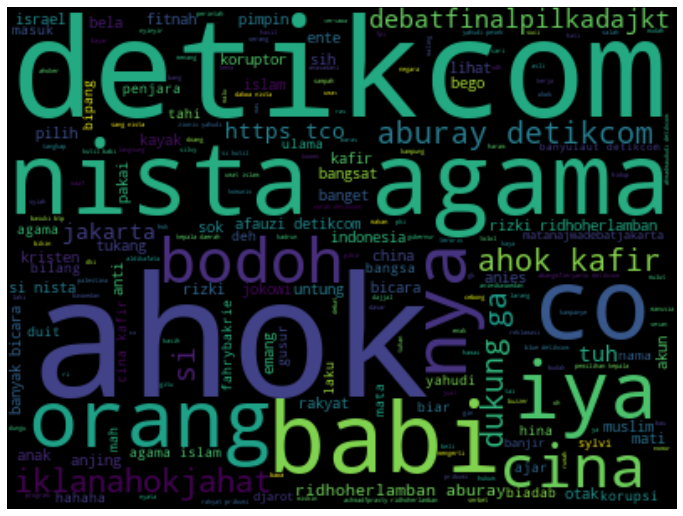

In [ ]:
hs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non Hate Speech Wordcloud

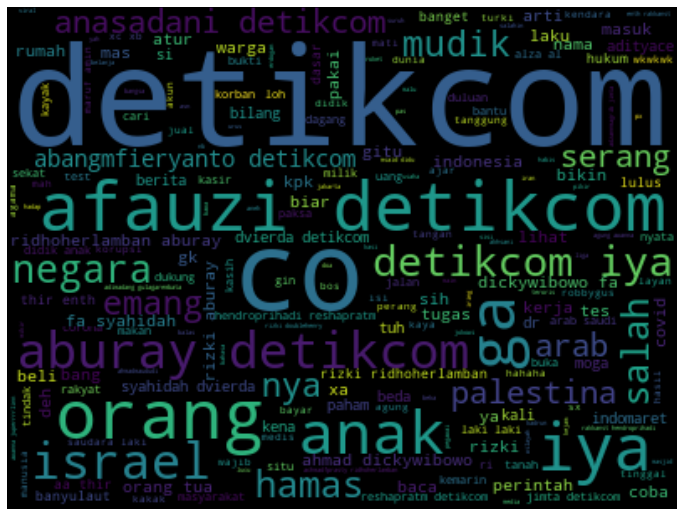

In [ ]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Abusive Wordcloud

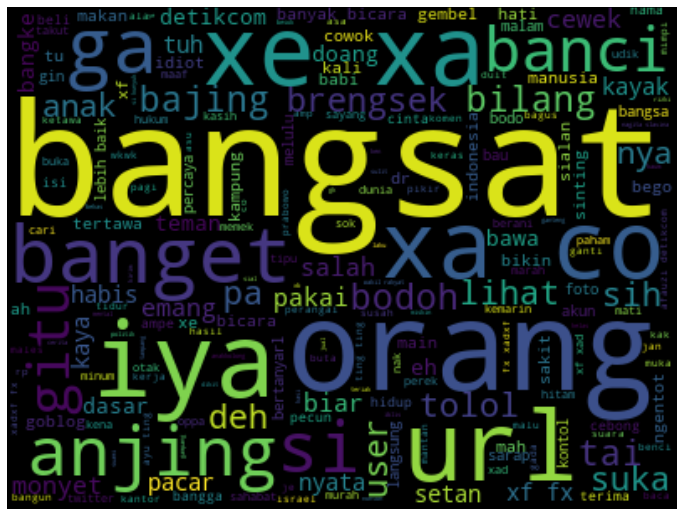

In [ ]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==2]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [ ]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.984561403508772
0.8907563025210085


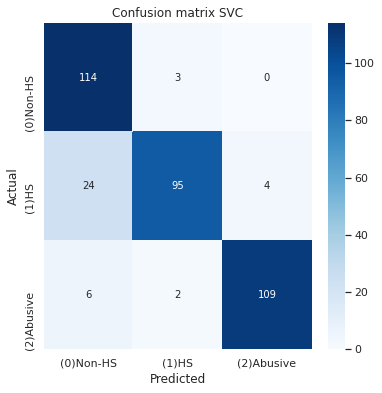

In [ ]:
print_conf(y_test, y_pred_svc, ['(0)Non-HS', '(1)HS', '(2)Abusive'], title="Confusion matrix SVC")

In [ ]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       117
           1       0.95      0.77      0.85       123
           2       0.96      0.93      0.95       117

    accuracy                           0.89       357
   macro avg       0.90      0.89      0.89       357
weighted avg       0.90      0.89      0.89       357



### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data

In [ ]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9164912280701755
0.8487394957983193


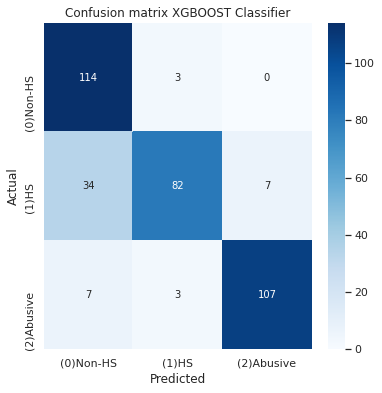

In [ ]:
print_conf(y_test, y_pred_xgb, ['(0)Non-HS', '(1)HS', '(2)Abusive'], title="Confusion matrix XGBOOST Classifier")

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       117
           1       0.93      0.67      0.78       123
           2       0.94      0.91      0.93       117

    accuracy                           0.85       357
   macro avg       0.87      0.85      0.85       357
weighted avg       0.87      0.85      0.85       357



#### XGBOOOST - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1], #so called `eta` value
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [100, 250, 500] #number of trees, change it to 1000 for better results
}


In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1_weighted', n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(tfidf_vector, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='dep

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 500}

In [ ]:
xgb_rscv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.025, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_rscv.fit(X_train, y_train) #training svc model
y_pred_xgb_rscv = xgb_rscv.predict(X_test) # predicting test data

In [ ]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

0.9368421052631579
0.8515406162464986


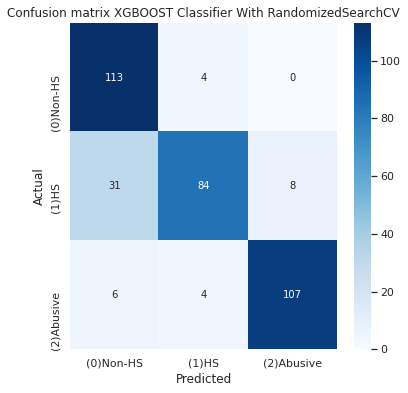

In [ ]:
print_conf(y_test, y_pred_xgb_rscv, ['(0)Non-HS', '(1)HS', '(2)Abusive'], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

### Neural Network

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!pip install keras

In [ ]:
# Import Libraries for Neural Network
from keras.models import Sequential
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(30, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                163530    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 164,071
Trainable params: 164,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# run model
history = model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
143/143 [==============================] - 15s 8ms/step - loss: 0.6138 - accuracy: 0.3241 - val_loss: -0.1752 - val_accuracy: 0.3445
Epoch 2/10
143/143 [==============================] - 1s 4ms/step - loss: -1.6204 - accuracy: 0.3468 - val_loss: -12.0859 - val_accuracy: 0.4258
Epoch 3/10
143/143 [==============================] - 1s 4ms/step - loss: -36.8984 - accuracy: 0.4963 - val_loss: -129.5600 - val_accuracy: 0.4090
Epoch 4/10
143/143 [==============================] - 1s 4ms/step - loss: -296.7202 - accuracy: 0.4843 - val_loss: -624.7198 - val_accuracy: 0.4090
Epoch 5/10
143/143 [==============================] - 1s 5ms/step - loss: -1231.1255 - accuracy: 0.5066 - val_loss: -1952.4891 - val_accuracy: 0.4062
Epoch 6/10
143/143 [==============================] - 1s 4ms/step - loss: -3670.8136 - accuracy: 0.4905 - val_loss: -4909.4946 - val_accuracy: 0.4090
Epoch 7/10
143/143 [==============================] - 1s 5ms/step - loss: -8569.6176 - accuracy: 0.5032 - val_loss: 

In [ ]:
# Check the Accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5425
Testing Accuracy:  0.3950


In [ ]:
# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

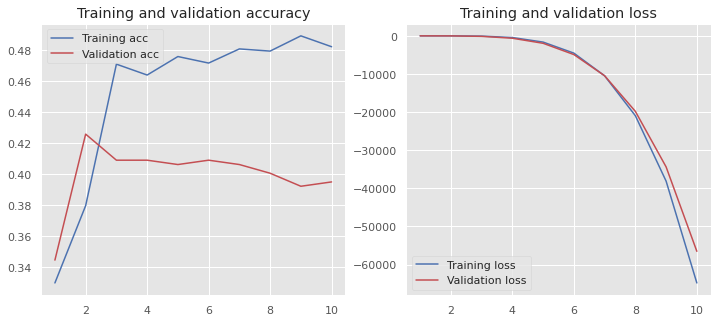

In [ ]:
plot_history(history)

In [ ]:
# Save Model Layer
from tensorflow.keras.utils import plot_model
plot_model(model)

AssertionError: ignored

In [ ]:
# Save Model
model.save('model', save_format="tf")

INFO:tensorflow:Assets written to: model/assets


## Model Comparison

In [ ]:
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomSearchCV','Neural Network']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accXGB_RSCV , accuracy]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.890756
1,XGBOOST,0.848739
2,RandomSearchCV,0.851541
3,Neural Network,0.394958


In [ ]:
import joblib

# Saving model
joblib.dump(svc, 'Hate Speech Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Hate Speech TF-IDF Vectorizer.joblib')

['Hate Speech TF-IDF Vectorizer.joblib']

In [ ]:
df['prediction'] = svc.predict(tfidf_vectorizer.transform(df['Tweet']))
#df['prediction'] = df['prediction'].apply(lambda x: 'HS' if x==1 else 'Non_HS')
df['prediction']=df['prediction'].apply(lambda x: 'HS' if x==1  else 'Abusive' if x==2 else 'Non_HS')

# Save new dataframe into csv file
df.to_csv('Hate Speech Classification.csv', index=False)

df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction
0,0,detikcom: Terpopuler Siapa bilang lulusan SMK ...,139,detikcom terpopuler siapa bilang lulusan smk t...,"[detikcom, terpopuler, siapa, bilang, lulusan,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, siapa, bilang, lulus, smk,...","[detikcom, populer, bilang, lulus, smk, startu...",detikcom populer bilang lulus smk startup pria...,Non_HS
1,1,detikcom: Anggota DPR RI Fadli Zon menyentil...,137,detikcom anggota dpr ri fadli zon menyentil ke...,"[detikcom, anggota, dpr, ri, fadli, zon, menye...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...","[detikcom, anggota, dpr, ri, fadli, zon, senti...",detikcom anggota dpr ri fadli zon sentil bijak...,HS
2,0,detikcom: Ayam gulai McDonalds sedang viral ak...,141,detikcom ayam gulai mcdonalds sedang viral akh...,"[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, sedang, vir...","[detikcom, ayam, gulai, mcdonalds, viral, yout...",detikcom ayam gulai mcdonalds viral youtuber j...,Non_HS
3,0,detikcom: Beragam pertanyaan kontroversial did...,145,detikcom beragam pertanyaan kontroversial didu...,"[detikcom, beragam, pertanyaan, kontroversial,...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, tanya, kontroversial, duga, a...","[detikcom, agam, kontroversial, duga, tes, mas...",detikcom agam kontroversial duga tes masuk thr...,Non_HS
4,0,detikcom: Bobby geram karena melihat ada tulis...,142,detikcom bobby geram karena melihat ada tulisa...,"[detikcom, bobby, geram, karena, melihat, ada,...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, karena, lihat, ada, t...","[detikcom, bobby, geram, lihat, tulis, tutup, ...",detikcom bobby geram lihat tulis tutup meja la...,Non_HS


## Predict New Data

In [ ]:
input_tweet = ['dasar cina',
               'terima kasih',
               'Kalo jodoh ditangan tuhan mungkin mantan kita sekarang sedang ditangan setan'
               ]

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
            print('Input text:\n', 
                input_tweet[i], 
                '\nPrediction: \nHate Speech!\n')
        elif input_prediction[i]==2:
            print('Input text:\n', 
                input_tweet[i], 
                "\nPrediction: \nAbusive.\n")
        else:
            print('Input text:\n', 
                input_tweet[i], 
                "\nPrediction: \nNot a Hate Speech.\n")
            
predictNewData(input_tweet)

Input text:
 dasar cina 
Prediction: 
Hate Speech!

Input text:
 terima kasih 
Prediction: 
Abusive.

Input text:
 Kalo jodoh ditangan tuhan mungkin mantan kita sekarang sedang ditangan setan 
Prediction: 
Abusive.



# Stratified KFold CV

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
model = SVC(kernel='linear')

train_scores = []
test_scores = []
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
for train_index, test_index in skf.split(tfidf_vector, label):
    X_train = tfidf_vector[train_index]
    X_test = tfidf_vector[test_index]
    y_train = label[train_index]
    y_test = label[test_index]

    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    prec = metrics.precision_score(y_test, y_pred, average='macro')
    rec = metrics.recall_score(y_test, y_pred, average='micro')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy for the fold no. {i} on the test set: {metrics.accuracy_score(y_test, y_pred)}, doublecheck: {model.score(X_test,y_test)}")
    print("precision: ", prec)
    print("recall: ", rec)
    print("f1: ", f1)
    print('\n')

    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress

Accuracy for the fold no. 1032 on the test set: 0.7206703910614525, doublecheck: 0.7206703910614525
precision:  0.7714285714285714
recall:  0.7206703910614525
f1:  0.7182904715158529


Accuracy for the fold no. 1032 on the test set: 0.6983240223463687, doublecheck: 0.6983240223463687
precision:  0.7042225534028813
recall:  0.6983240223463687
f1:  0.6776339896785454


Accuracy for the fold no. 1032 on the test set: 0.7247191011235955, doublecheck: 0.7247191011235955
precision:  0.7207860445565363
recall:  0.7247191011235955
f1:  0.7212825184735298


Accuracy for the fold no. 1032 on the test set: 0.9382022471910112, doublecheck: 0.9382022471910112
precision:  0.9406249999999999
recall:  0.9382022471910112
f1:  0.9381457852068146


Accuracy for the fold no. 1032 on the test set: 0.9662921348314607, doublecheck: 0.9662921348314607
precision:  0.9672408991828229
recall:  0.9662921348314607
f1:  0.9663689457208703


Accuracy for the fold no. 1032 on the test set: 0.898876404494382, doublech

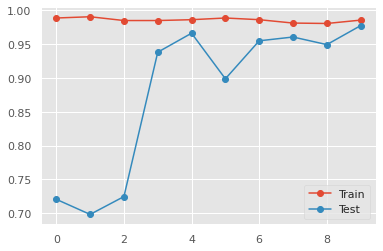

In [ ]:
plt.plot(train_scores, '-o', label='Train')
plt.plot(test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9856608478802993
0.9775280898876404


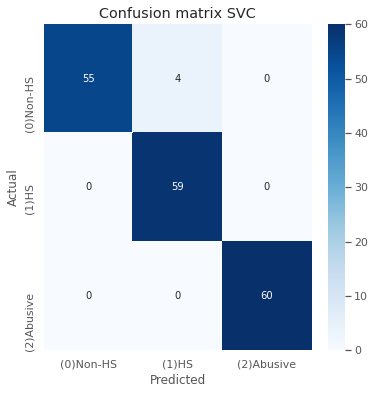

In [ ]:
print_conf(y_test, y_pred, ['(0)Non-HS', '(1)HS', '(2)Abusive'], title="Confusion matrix SVC")

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.94      1.00      0.97        59
           2       1.00      1.00      1.00        60

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

